In [45]:
#import all required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import pickle

In [53]:
#import the data
train_data = pd.read_csv("C:\\Users\\D\Desktop\\New folder\\SCA Cohort 3 mentorshp programme\\Training.csv")

In [54]:
#to view the the top 5 rows of the data
train_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [55]:
#shape of the data
train_data.shape

(4920, 134)

In [56]:
# to check the the columns with the highest null rows
train_data.isna().sum().sort_values(ascending=False).head()

Unnamed: 133                    4920
blurred_and_distorted_vision       0
loss_of_appetite                   0
pain_behind_the_eyes               0
back_pain                          0
dtype: int64

In [57]:
#drop the null column
train_data = train_data.drop(['Unnamed: 133'], axis=1)

In [58]:
# shape of the data after droping the null column
train_data.shape

(4920, 133)

In [59]:
pd.DataFrame(train_data.columns)

,0
0,itching
1,skin_rash
2,nodal_skin_eruptions
3,continuous_sneezing
4,shivering
...,...
128,inflammatory_nails
129,blister
130,red_sore_around_nose
131,yellow_crust_ooze


In [60]:
train_data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [61]:
# to get the distribution of the target variable
train_data['prognosis'].value_counts()

Psoriasis                                  120
Chicken pox                                120
Hyperthyroidism                            120
Drug Reaction                              120
Hypothyroidism                             120
Migraine                                   120
Common Cold                                120
Hepatitis E                                120
Hepatitis D                                120
Hepatitis B                                120
Bronchial Asthma                           120
(vertigo) Paroymsal  Positional Vertigo    120
Cervical spondylosis                       120
AIDS                                       120
Pneumonia                                  120
Alcoholic hepatitis                        120
Typhoid                                    120
Dimorphic hemmorhoids(piles)               120
Paralysis (brain hemorrhage)               120
Urinary tract infection                    120
Fungal infection                           120
Hypoglycemia 

In [81]:
# to get the full list of the columns
columns_train = train_data.columns.tolist()
print(columns_train)

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bow

In [62]:
train_data.dtypes.unique()

array([dtype('int64'), dtype('O')], dtype=object)

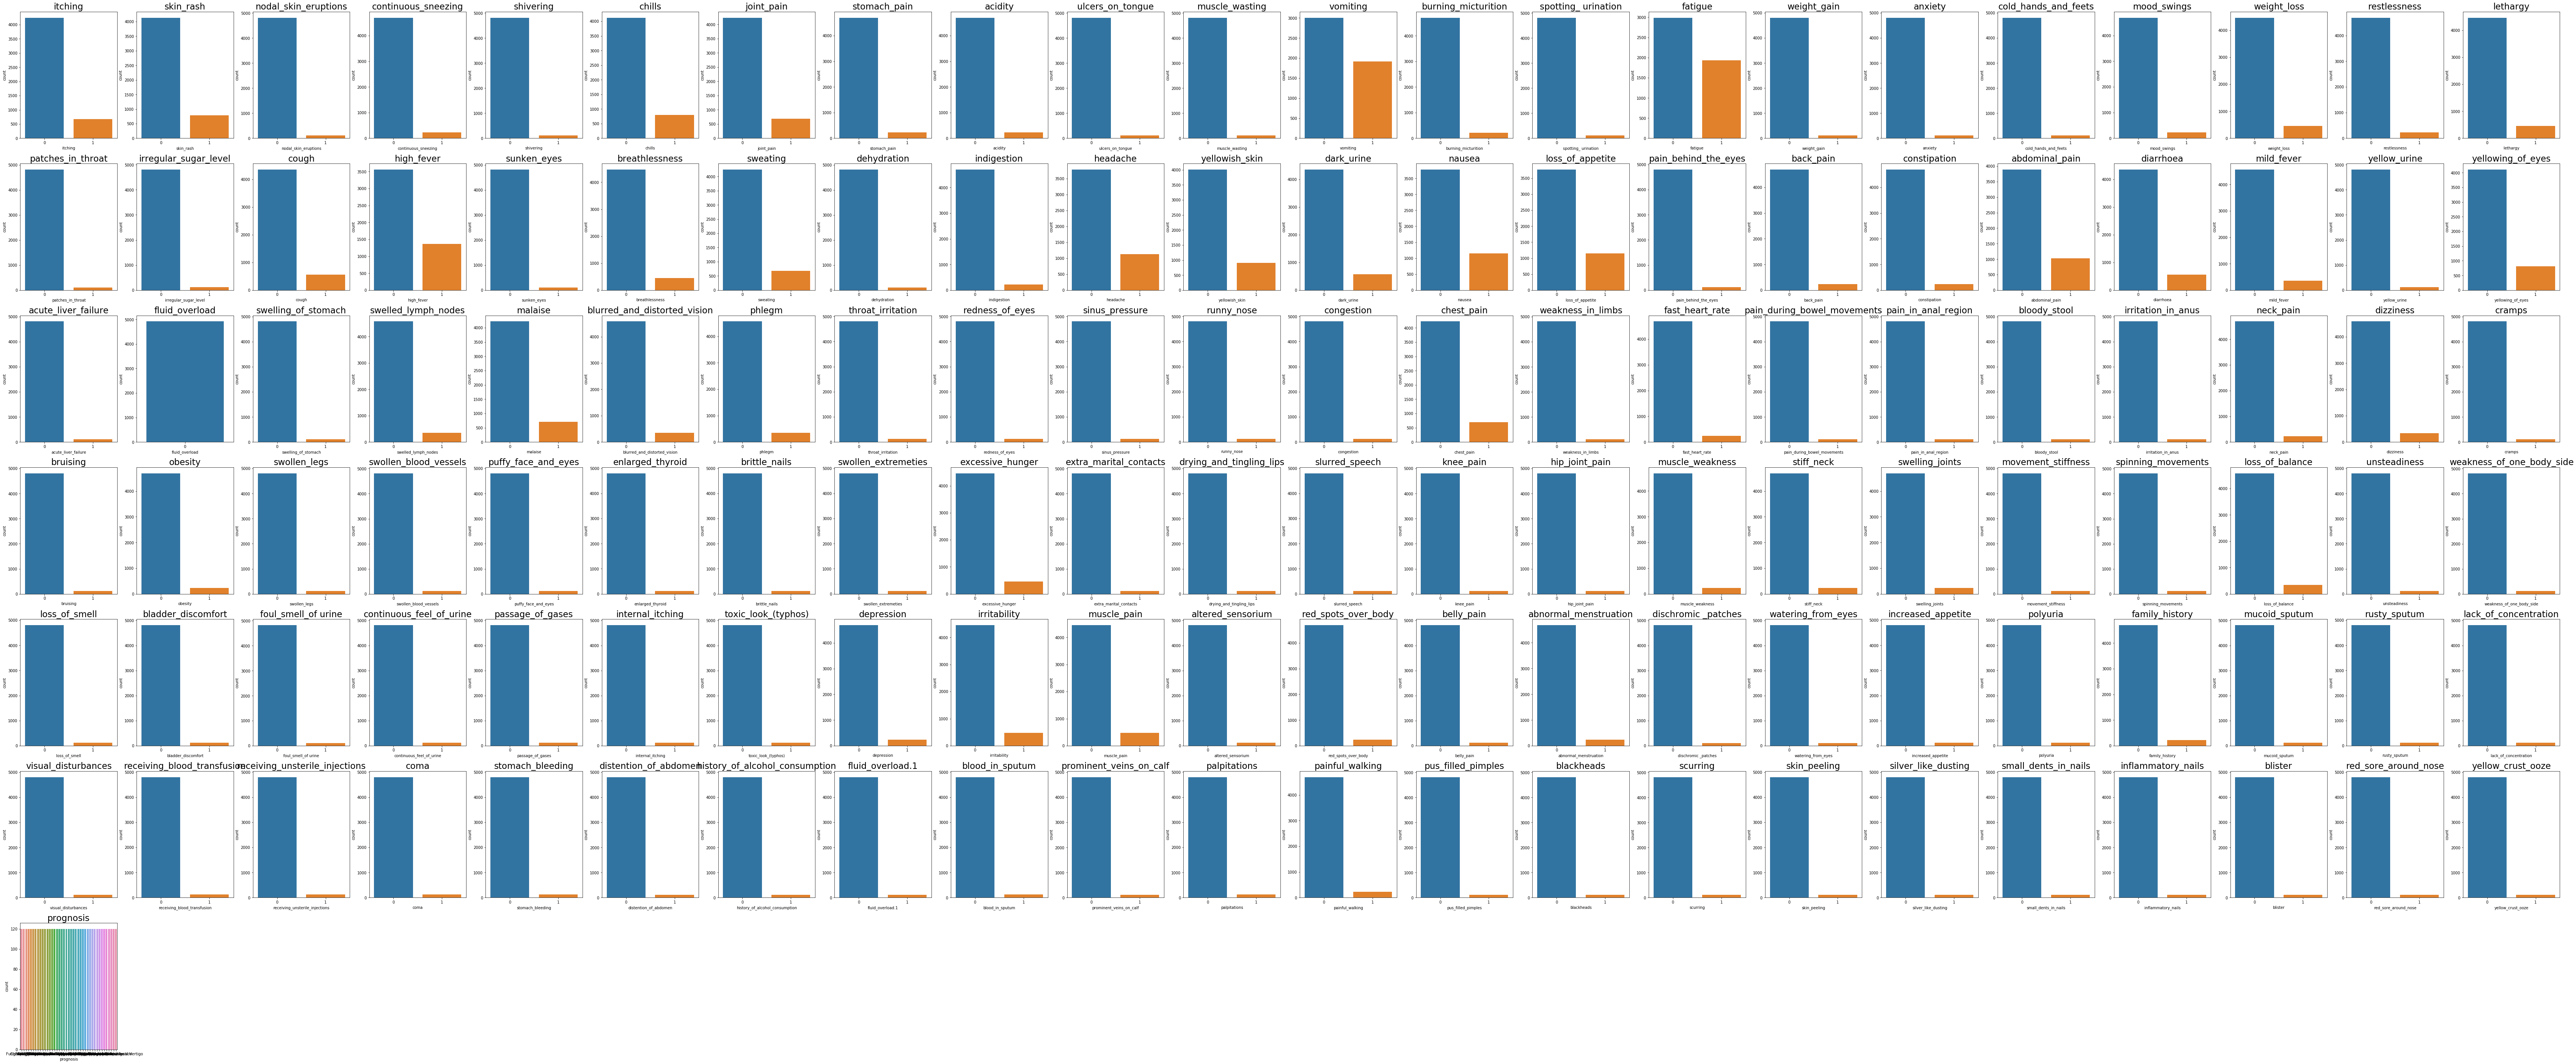

In [45]:
# to visualize the data, the distribution of each column
for x in range(train_data.shape[1]):
    plt.subplot(7,22,x+1)
    plt.subplots_adjust(left = 0.5, right = 16 , top = 10, bottom = 0.5)
    sns.countplot(df[train_data.columns[x]]).set_title(train_data.columns[x],fontsize=23)

In [63]:
#separating the dependent and the independent variables
x = train_data.drop(['prognosis'],axis =1)
y = train_data['prognosis']

In [64]:
#splitting the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [65]:
# model training
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [66]:
# to predict usng the test data
y_pred = mnb.predict(x_test)

In [67]:
# check the accuracy of the prediction.
accuracy_score(y_pred,y_test)

1.0

In [68]:
#picking the top three predictions for each test.
y_pred_m = mnb.predict_proba(x_test)
best_three = np.argsort(-y_pred_m, axis=1)[:,:3]

In [69]:
for i in range(0, len(real_diseases)):
    if y_pred[i] == real_diseases[i]:
        print ('Pred: {0} Actual:{1}'.format(mnb.classes_[best_three[i]], real_diseases[i]))
    else:
        print('worng prediction')
        print ('Pred: {0} Actual:{1}'.format(best_three[i], real_diseases[i]))

Pred: ['Acne' 'Fungal infection' 'Impetigo'] Actual:Acne
Pred: ['Acne' 'Fungal infection' 'Impetigo'] Actual:Acne
Pred: ['Hyperthyroidism' 'Diabetes ' 'Hypoglycemia'] Actual:Hyperthyroidism
Pred: ['AIDS' 'Impetigo' 'Bronchial Asthma'] Actual:AIDS
Pred: ['Chronic cholestasis' 'Hepatitis D' 'hepatitis A'] Actual:Chronic cholestasis
Pred: ['Hypertension ' 'Cervical spondylosis'
 '(vertigo) Paroymsal  Positional Vertigo'] Actual:Hypertension 
Pred: ['Hypoglycemia' 'Malaria' 'Migraine'] Actual:Hypoglycemia
Pred: ['Arthritis' 'Osteoarthristis' 'Migraine'] Actual:Arthritis
Pred: ['Hepatitis B' 'Hepatitis D' 'Chronic cholestasis'] Actual:Hepatitis B
Pred: ['Migraine' 'Hypoglycemia' 'Paralysis (brain hemorrhage)'] Actual:Migraine
Pred: ['Urinary tract infection' 'Drug Reaction' 'Acne'] Actual:Urinary tract infection
Pred: ['Diabetes ' 'Hyperthyroidism' 'Hypoglycemia'] Actual:Diabetes 
Pred: ['Hepatitis D' 'Hepatitis E' 'hepatitis A'] Actual:Hepatitis D
Pred: ['Psoriasis' 'Acne' 'Fungal infectio

Pred: ['Dengue' 'Chicken pox' 'Malaria'] Actual:Dengue
Pred: ['Chicken pox' 'Dengue' 'Hepatitis B'] Actual:Chicken pox
Pred: ['Hepatitis E' 'Hepatitis D' 'hepatitis A'] Actual:Hepatitis E
Pred: ['Osteoarthristis' 'Arthritis' 'Cervical spondylosis'] Actual:Osteoarthristis
Pred: ['Common Cold' 'Pneumonia' 'Tuberculosis'] Actual:Common Cold
Pred: ['Hepatitis C' 'Hepatitis D' 'Hepatitis E'] Actual:Hepatitis C
Pred: ['Hypoglycemia' 'Malaria' 'Migraine'] Actual:Hypoglycemia
Pred: ['Bronchial Asthma' 'Pneumonia' 'Tuberculosis'] Actual:Bronchial Asthma
Pred: ['Allergy' 'Common Cold' 'Malaria'] Actual:Allergy
Pred: ['Hypoglycemia' 'Migraine' 'Hyperthyroidism'] Actual:Hypoglycemia
Pred: ['Dimorphic hemmorhoids(piles)' 'Typhoid' 'Acne'] Actual:Dimorphic hemmorhoids(piles)
Pred: ['Allergy' 'Common Cold' 'Malaria'] Actual:Allergy
Pred: ['Bronchial Asthma' 'Pneumonia' 'Tuberculosis'] Actual:Bronchial Asthma
Pred: ['Hepatitis C' 'Hepatitis D' 'Hepatitis E'] Actual:Hepatitis C
Pred: ['Hepatitis C' 'He

Pred: ['hepatitis A' 'Hepatitis D' 'Chronic cholestasis'] Actual:hepatitis A
Pred: ['(vertigo) Paroymsal  Positional Vertigo' 'Malaria'
 'Paralysis (brain hemorrhage)'] Actual:(vertigo) Paroymsal  Positional Vertigo
Pred: ['Impetigo' 'Chicken pox' 'Dengue'] Actual:Impetigo
Pred: ['Dengue' 'Chicken pox' 'Malaria'] Actual:Dengue
Pred: ['Varicose veins' 'Diabetes ' 'Bronchial Asthma'] Actual:Varicose veins
Pred: ['Hypoglycemia' 'Heart attack' 'Hyperthyroidism'] Actual:Hypoglycemia
Pred: ['Alcoholic hepatitis' 'Chronic cholestasis' 'Jaundice'] Actual:Alcoholic hepatitis
Pred: ['Hypertension ' 'Cervical spondylosis'
 '(vertigo) Paroymsal  Positional Vertigo'] Actual:Hypertension 
Pred: ['Migraine' 'Hypoglycemia' 'Paralysis (brain hemorrhage)'] Actual:Migraine
Pred: ['Urinary tract infection' 'Acne' 'Gastroenteritis'] Actual:Urinary tract infection
Pred: ['Dimorphic hemmorhoids(piles)' 'Acne' 'Gastroenteritis'] Actual:Dimorphic hemmorhoids(piles)
Pred: ['AIDS' 'Impetigo' 'Bronchial Asthma'] 

Pred: ['Allergy' 'Common Cold' 'Malaria'] Actual:Allergy
Pred: ['GERD' 'Heart attack' 'Tuberculosis'] Actual:GERD
Pred: ['Cervical spondylosis' 'Hypertension '
 '(vertigo) Paroymsal  Positional Vertigo'] Actual:Cervical spondylosis
Pred: ['Alcoholic hepatitis' 'Chronic cholestasis' 'Jaundice'] Actual:Alcoholic hepatitis
Pred: ['Jaundice' 'Hepatitis E' 'Hepatitis D'] Actual:Jaundice
Pred: ['(vertigo) Paroymsal  Positional Vertigo' 'Malaria'
 'Paralysis (brain hemorrhage)'] Actual:(vertigo) Paroymsal  Positional Vertigo
Pred: ['Hypoglycemia' 'Malaria' 'Migraine'] Actual:Hypoglycemia
Pred: ['Dengue' 'Chicken pox' 'Typhoid'] Actual:Dengue
Pred: ['Alcoholic hepatitis' 'Chronic cholestasis' 'Jaundice'] Actual:Alcoholic hepatitis
Pred: ['Hypothyroidism' 'Hyperthyroidism' 'Hypertension '] Actual:Hypothyroidism
Pred: ['Diabetes ' 'Hyperthyroidism' 'Hypoglycemia'] Actual:Diabetes 
Pred: ['Heart attack' 'Tuberculosis' 'Pneumonia'] Actual:Heart attack
Pred: ['Chicken pox' 'Dengue' 'Tuberculosis'] 

In [70]:
bam1 = [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
       0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
       0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
print(len(bam1))

132


In [71]:
bam=[
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0
  ]
print(len(bam))

132


In [73]:
y_pred = mnb.predict([bam])

In [75]:
y_pred_m1 = mnb.predict_proba([bam])
best_three1 = np.argsort(-y_pred_m1, axis=1)[:,:3]

In [76]:
print(mnb.classes_[best_three1])

[['Peptic ulcer diseae' 'Osteoarthristis' 'Fungal infection']]


In [78]:
#storing the model in the classifier.pkl file.
pickle_out = open("classifier.pkl", "wb")
pickle.dump(mnb,pickle_out)
pickle_out.close()

In [79]:
classifier = pickle.load(open('classifier.pkl', 'rb'))
y_pred_m1 = classifier.predict_proba([bam])
best_three1 = np.argsort(-y_pred_m1, axis=1)[:,:3]
predictions=mnb.classes_[best_three1]

In [80]:
print(predictions[0][0],predictions[0][1],predictions[0][2])

Peptic ulcer diseae Osteoarthristis Fungal infection
